## Uso de erramientas de `Machine Learning` con `Dask` 

In [67]:
import dask_ml.preprocessing as dpp
import dask.dataframe as dd

In [68]:
le = dpp.LabelEncoder()
df = dd.read_csv('data/air_traffic_data.csv')
#Hacemos cuatro particiones del dataframe
df = df.repartition(npartitions=4)
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


Voy a utilizar la columna `GEO Region` como parametro independiente

In [69]:
cols = ["Operating Airline","Published Airline"]
df = df.drop(cols,axis=1)
df.head()

,Activity Period,Operating Airline IATA Code,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,TZ,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,TZ,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,TZ,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,AC,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,AC,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


Aunque aquí arriba vemos que las columnas que queríamos eliminar siguen ahí, en la sigiente sentencia comprobaremos que estas dos columnas han sido eliminadas

In [70]:
col_obj = list(df.select_dtypes(include=['object']).columns)
col_obj

['Operating Airline IATA Code',
 'Published Airline IATA Code',
 'GEO Summary',
 'GEO Region',
 'Activity Type Code',
 'Price Category Code',
 'Terminal',
 'Boarding Area',
 'Adjusted Activity Type Code',
 'Month']

In [71]:
df.drop_duplicates(subset=col_obj, inplace=True)
df.dropna()

,Activity Period,Operating Airline IATA Code,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
npartitions=4,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,int64,object,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [72]:
df[df.isnull() == True].sum().compute()

Activity Period                0.0
Operating Airline IATA Code      0
Published Airline IATA Code      0
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                0.0
Adjusted Activity Type Code      0
Adjusted Passenger Count       0.0
Year                           0.0
Month                            0
dtype: object

In [73]:
df[df.isnull().sum().compute() > 0]

c:\Users\mglez\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\core.py:4844: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


,Activity Period,Operating Airline IATA Code,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
npartitions=4,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,int64,object,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [74]:
for i in col_obj:
    df[i] = df[i].astype(str)

In [75]:
for i in col_obj:
    print(i)

Operating Airline IATA Code
Published Airline IATA Code
GEO Summary
GEO Region
Activity Type Code
Price Category Code
Terminal
Boarding Area
Adjusted Activity Type Code
Month


Usamos el `LabelEncoder` para pasar todas las columnas de strings a números

In [76]:
for i in col_obj:
    le.fit(df[i])
    df[i] = le.fit_transform(df[i])

In [77]:
df.head()

,Activity Period,Operating Airline IATA Code,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,60,54,0,8,0,0,2,1,27271,0,27271,2005,5
1,200507,60,54,0,8,1,0,2,1,29131,1,29131,2005,5
2,200507,60,54,0,8,2,0,2,1,5415,2,10830,2005,5
3,200507,6,6,1,2,0,1,2,1,35156,0,35156,2005,5
4,200507,6,6,1,2,1,1,2,1,34090,1,34090,2005,5


In [78]:
import seaborn as sns

In [79]:
lista_columnas=list(df.columns)
for i in range(len(lista_columnas)):
    print(f"{i}. {lista_columnas[i]}")

0. Activity Period
1. Operating Airline IATA Code
2. Published Airline IATA Code
3. GEO Summary
4. GEO Region
5. Activity Type Code
6. Price Category Code
7. Terminal
8. Boarding Area
9. Passenger Count
10. Adjusted Activity Type Code
11. Adjusted Passenger Count
12. Year
13. Month


<AxesSubplot:>

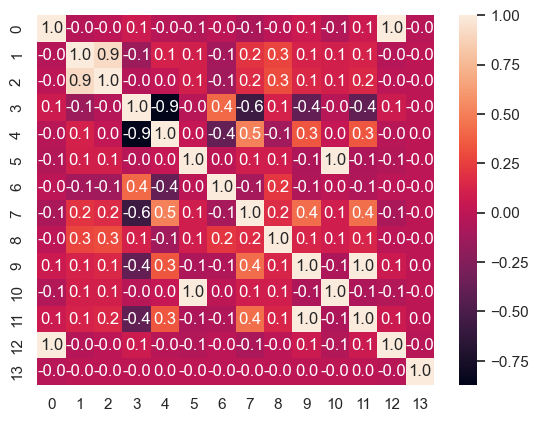

In [80]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")

Viendo el mapa de correlación y el listado de las columnas que tenemos arriba, deberíamos librarnos de aquellas columnas que no mantengan correlación con la columna independiente `Geo Region`.

Por ahora vamos a liberar las columnas `0,4,7,12,14,15`

In [81]:
columnas=["Activity Period","Published Airline IATA Code","Activity Type Code","Adjusted Activity Type Code","Year","Month"]
df=df.drop(columnas,axis=1)

Pintamos nuevamente el mapa de correlación

In [82]:
lista_columnas=list(df.columns)
for i in range(len(lista_columnas)):
    print(f"{i}. {lista_columnas[i]}")

0. Operating Airline IATA Code
1. GEO Summary
2. GEO Region
3. Price Category Code
4. Terminal
5. Boarding Area
6. Passenger Count
7. Adjusted Passenger Count


<AxesSubplot:>

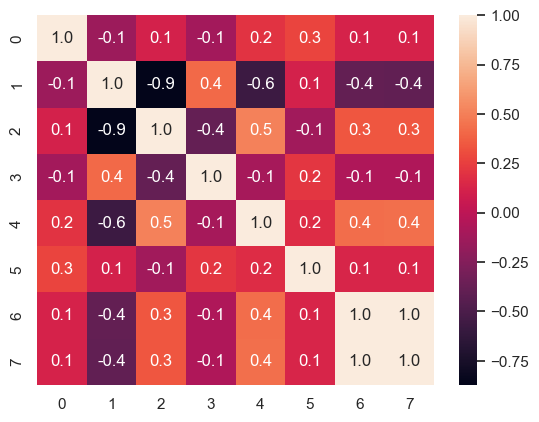

In [83]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")

Voy a probar con un modelo de `regresión lineal` con los datos así, sino igual quitlo las columnas `1,2,3,7`.

In [84]:
import dask_ml.linear_model as dml
import dask_ml.model_selection as dms

Creamos el modelo de regresión lineal

In [85]:
ddf = df.to_dask_array(lengths=True)
ddf

KeyboardInterrupt: 

In [86]:
lr = dml.LinearRegression()

Y = df["GEO Region"]
X = df.drop("GEO Region",axis=1)

Función que he creado para poder ver el shape de los `DataFrame`

In [87]:
def shaper(df):
    try:
        return f"({df.shape[0].compute()}, {df.shape[1]})"
    except:
        return f"({df.shape[0].compute()}, )"

In [89]:
X.head()

,Operating Airline IATA Code,GEO Summary,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Passenger Count
0,60,0,0,2,1,27271,27271
1,60,0,0,2,1,29131,29131
2,60,0,0,2,1,5415,10830
3,6,1,1,2,1,35156,35156
4,6,1,1,2,1,34090,34090


In [90]:
Y.head()

0    8
1    8
2    8
3    2
4    2
Name: GEO Region, dtype: int64

In [ ]:
X.to_dask_array(lengths=True)
Y.to_dask_array(lengths=True)

dask.array<values, shape=(15007,), dtype=int64, chunksize=(3752,), chunktype=numpy.ndarray>

In [92]:
X_train, Y_train, X_test, Y_test = dms.train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [93]:
X_train.head()

,Operating Airline IATA Code,GEO Summary,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Passenger Count
1422,72,0,1,4,4,7820,7820
3521,52,0,1,2,1,2761,2761
1960,7,1,1,0,0,7256,7256
1754,19,1,1,0,0,10504,10504
2813,71,0,1,2,1,1285,1285


In [94]:
Y_train.head()

,Operating Airline IATA Code,GEO Summary,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Passenger Count
182,72,0,1,2,0,3382,3382
3676,57,0,0,2,1,2056,2056
1665,45,0,1,2,2,50423,50423
2437,25,0,1,2,2,3739,3739
397,33,0,1,2,2,6962,6962


In [96]:
Y_train = Y_train.to_dask_array(lengths=True)

In [97]:
lr.fit(X_train,Y_train)

TypeError: This estimator does not support dask dataframes. This might be resolved with one of

    1. ddf.to_dask_array(lengths=True)
    2. ddf.to_dask_array()  # may cause other issues because of unknown chunk sizes

In [ ]:
X_train.to_dask_array(lengths=True)
Y_train.to_dask_array(lengths=True)

dask.array<values, shape=(2923, 9), dtype=int64, chunksize=(754, 9), chunktype=numpy.ndarray>

In [ ]:
lr.fit(X_train,Y_train)

TypeError: This estimator does not support dask dataframes. This might be resolved with one of

    1. ddf.to_dask_array(lengths=True)
    2. ddf.to_dask_array()  # may cause other issues because of unknown chunk sizes

<AxesSubplot:xlabel='Adjusted Passenger Count', ylabel='Count'>

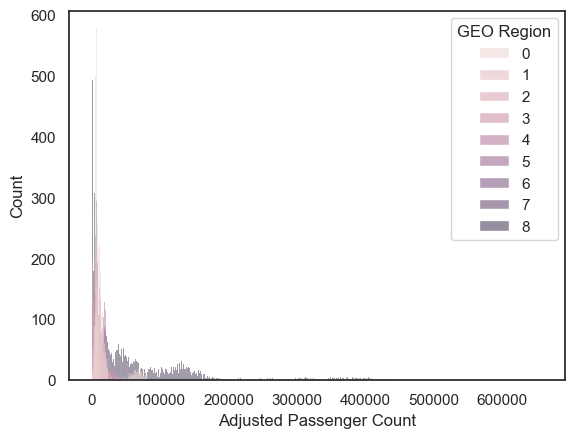

In [ ]:
sns.histplot(data=df, x="Adjusted Passenger Count", hue="GEO Region")

In [ ]:
df.groupby("GEO Region")["Adjusted Passenger Count"].mean().compute().sort_values(ascending=False)

GEO Region
US                     58485.878385
Asia                   13508.552704
Europe                 12779.055050
Canada                  9803.791255
Middle East             8658.612150
Mexico                  7250.898655
Australia / Oceania     6495.104478
Central America         4946.715328
South America           2786.011111
Name: Adjusted Passenger Count, dtype: float64

Por lo que podemos ver hay notablemente más pasageros cuya GEO Region es Estados Unidos